### Looking for interaction terms

In [72]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense;
%matplotlib inline

In [73]:
df = pd.read_csv('./train_plus_weather.csv')
df.drop('Unnamed: 0', axis='columns', inplace=True)
# Delete columns with null values
df.drop(['Water1_2', 'Depart_2', 'Water1_1', 'Depart_1'], axis='columns', inplace=True)

In [74]:
df.Species.nunique()

7

*7 different species*

In [75]:
df.head()

,Species,Trap,Latitude,Longitude,AddressAccuracy,WnvPresent,month,day,year,Tmax_1,...,Sunrise_2,Sunset_2,Depth_2,SnowFall_2,PrecipTotal_2,StnPressure_2,SeaLevel_2,ResultSpeed_2,ResultDir_2,AvgSpeed_2
0,2,1,41.954690,-87.800991,9,0,5,29,2007,88.0,...,421.0,421.0,0.0,0.0,0.0,29.44,30.09,5.8,16,7.4
1,3,1,41.954690,-87.800991,9,0,5,29,2007,88.0,...,421.0,421.0,0.0,0.0,0.0,29.44,30.09,5.8,16,7.4
2,3,8,41.994991,-87.769279,9,0,5,29,2007,88.0,...,421.0,421.0,0.0,0.0,0.0,29.44,30.09,5.8,16,7.4
3,2,15,41.974089,-87.824812,8,0,5,29,2007,88.0,...,421.0,421.0,0.0,0.0,0.0,29.44,30.09,5.8,16,7.4
4,3,15,41.974089,-87.824812,8,0,5,29,2007,88.0,...,421.0,421.0,0.0,0.0,0.0,29.44,30.09,5.8,16,7.4


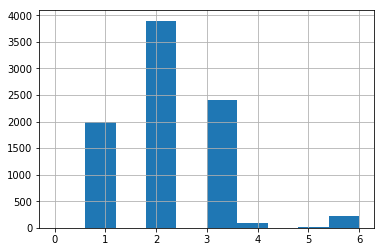

In [76]:
df.Species.hist()

In [77]:
df.Species.value_counts()

2    3899
3    2409
1    1996
6     216
4      83
5       6
0       1
Name: Species, dtype: int64

In [78]:
df.groupby(['Species', 'WnvPresent']).count()

Trap  Latitude  Longitude  AddressAccuracy  month   day  \
Species WnvPresent                                                            
0       0              1         1          1                1      1     1   
1       0           1812      1812       1812             1812   1812  1812   
        1            184       184        184              184    184   184   
2       0           3674      3674       3674             3674   3674  3674   
        1            225       225        225              225    225   225   
3       0           2361      2361       2361             2361   2361  2361   
        1             48        48         48               48     48    48   
4       0             83        83         83               83     83    83   
5       0              6         6          6                6      6     6   
6       0            216       216        216              216    216   216   

                    year  Tmax_1  Tmin_1  Tavg_1     ...      Sunrise_2  \
Species WnvPresent                                   ...                  
0       0              1       1       1       1     ...              1   
1       0           1812    1812    1812    1812     ...           1812   
        1            184     184     184     184     ...            184   
2       0           3674    3674    3674    3674     ...           3674   
        1            225     225     225     225     ...            225   
3       0           2361    2361    2361    2361     ...           2361   
        1             48      48      48      48     ...             48   
4       0             83      83      83      83     ...             83   
5       0              6       6       6       6     ...              6   
6       0            216     216     216     216     ...            216   

                    Sunset_2  Depth_2  SnowFall_2  PrecipTotal_2  \
Species WnvPresent                                                 
0       0                  1        1           1              1   
1       0               1812     1812        1812           1812   
        1                184      184         184            184   
2       0               3674     3674        3674           3674   
        1                225      225         225            225   
3       0               2361     2361        2361           2361   
        1                 48       48          48             48   
4       0                 83       83          83             83   
5       0                  6        6           6              6   
6       0                216      216         216            216   

                    StnPressure_2  SeaLevel_2  ResultSpeed_2  ResultDir_2  \
Species WnvPresent                                                          
0       0                       1           1              1            1   
1       0                    1812        1812           1812         1812   
        1                     184         184            184          184   
2       0                    3674        3674           3674         3674   
        1                     225         225            225          225   
3       0                    2361        2361           2361         2361   
        1                      48          48             48           48   
4       0                      83          83             83           83   
5       0                       6           6              6            6   
6       0                     216         216            216          216   

                    AvgSpeed_2  
Species WnvPresent              
0       0                    1  
1       0                 1812  
        1                  184  
2       0                 3674  
        1                  225  
3       0                 2361  
        1                   48  
4       0                   83  
5       0                    6  
6       0                  216  

[10 rows x 42 columns]

In [79]:
df = df[(df.Species == 1) | (df.Species == 2) | (df.Species == 3)]
df.head()

,Species,Trap,Latitude,Longitude,AddressAccuracy,WnvPresent,month,day,year,Tmax_1,...,Sunrise_2,Sunset_2,Depth_2,SnowFall_2,PrecipTotal_2,StnPressure_2,SeaLevel_2,ResultSpeed_2,ResultDir_2,AvgSpeed_2
0,2,1,41.954690,-87.800991,9,0,5,29,2007,88.0,...,421.0,421.0,0.0,0.0,0.0,29.44,30.09,5.8,16,7.4
1,3,1,41.954690,-87.800991,9,0,5,29,2007,88.0,...,421.0,421.0,0.0,0.0,0.0,29.44,30.09,5.8,16,7.4
2,3,8,41.994991,-87.769279,9,0,5,29,2007,88.0,...,421.0,421.0,0.0,0.0,0.0,29.44,30.09,5.8,16,7.4
3,2,15,41.974089,-87.824812,8,0,5,29,2007,88.0,...,421.0,421.0,0.0,0.0,0.0,29.44,30.09,5.8,16,7.4
4,3,15,41.974089,-87.824812,8,0,5,29,2007,88.0,...,421.0,421.0,0.0,0.0,0.0,29.44,30.09,5.8,16,7.4


In [82]:
df.tail()

,Species,Trap,Latitude,Longitude,AddressAccuracy,WnvPresent,month,day,year,Tmax_1,...,Sunrise_2,Sunset_2,Depth_2,SnowFall_2,PrecipTotal_2,StnPressure_2,SeaLevel_2,ResultSpeed_2,ResultDir_2,AvgSpeed_2
8605,2,27,41.763733,-87.742302,8,1,9,26,2013,75.0,...,543.0,543.0,0.0,0.0,0.0,29.4,30.04,4.1,9,4.6
8606,2,139,41.987280,-87.666066,8,0,9,26,2013,75.0,...,543.0,543.0,0.0,0.0,0.0,29.4,30.04,4.1,9,4.6
8607,2,140,41.912563,-87.668055,9,0,9,26,2013,75.0,...,543.0,543.0,0.0,0.0,0.0,29.4,30.04,4.1,9,4.6
8608,2,141,42.009876,-87.807277,9,0,9,26,2013,75.0,...,543.0,543.0,0.0,0.0,0.0,29.4,30.04,4.1,9,4.6
8609,2,143,41.776428,-87.627096,8,0,9,26,2013,75.0,...,543.0,543.0,0.0,0.0,0.0,29.4,30.04,4.1,9,4.6


In [83]:
df.columns

Index(['Species', 'Trap', 'Latitude', 'Longitude', 'AddressAccuracy',
       'WnvPresent', 'month', 'day', 'year', 'Tmax_1', 'Tmin_1', 'Tavg_1',
       'DewPoint_1', 'WetBulb_1', 'Heat_1', 'Cool_1', 'Sunrise_1', 'Sunset_1',
       'Depth_1', 'SnowFall_1', 'PrecipTotal_1', 'StnPressure_1', 'SeaLevel_1',
       'ResultSpeed_1', 'ResultDir_1', 'AvgSpeed_1', 'Station', 'Tmax_2',
       'Tmin_2', 'Tavg_2', 'DewPoint_2', 'WetBulb_2', 'Heat_2', 'Cool_2',
       'Sunrise_2', 'Sunset_2', 'Depth_2', 'SnowFall_2', 'PrecipTotal_2',
       'StnPressure_2', 'SeaLevel_2', 'ResultSpeed_2', 'ResultDir_2',
       'AvgSpeed_2'],
      dtype='object')

In [101]:
df_wx1 = df[['Tmax_1', 'Tmin_1', 'Tavg_1', 'DewPoint_1', 'WetBulb_1', 'Heat_1', 'Cool_1', 'Sunrise_1', 'Sunset_1', 'Depth_1', 'SnowFall_1', 'PrecipTotal_1', 'StnPressure_1', 'SeaLevel_1',
    'ResultSpeed_1', 'ResultDir_1', 'AvgSpeed_1']]

In [102]:
df_wx2 = df[['Tmax_2',
       'Tmin_2', 'Tavg_2', 'DewPoint_2', 'WetBulb_2', 'Heat_2', 'Cool_2',
       'Sunrise_2', 'Sunset_2', 'Depth_2', 'SnowFall_2', 'PrecipTotal_2',
       'StnPressure_2', 'SeaLevel_2', 'ResultSpeed_2', 'ResultDir_2',
       'AvgSpeed_2']]

In [106]:
(np.matrix(df_wx1) != np.matrix(df_wx2)).sum()

0